## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`.

In [103]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from tensorflow import keras
from tensorflow.keras import layers

In [104]:
#Load the data
adult = pd.read_csv("/content/adult.csv")
adult.info()
adult.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Since we have selected the feaute variables and the target variable for our model, we have to preprocess the data in order to feed our model.
<li> 1.We are going to drop the rows for missing values in workcalss since there are only few. Also we are going to delete rows where worcklass is ?.Finally we will one-hot encode the values.
<li> 2.Create dummy variables for sex and race
<li> 3.Transform the target variable into 0 if income < 50k and 1 else.

In [105]:
#Function for preprocessing
def preprocess_df(df):
    df = df.copy()

    #Drop missing values from workclass
    df =  df.dropna(subset=["workclass"])

    #Drop rows with occupation ?
    df = df[df["occupation"] != '?']

    #Create one-hoot encoding for workclass
    df = pd.get_dummies(df, columns=["workclass", "marital-status", "sex", "occupation"], drop_first=True, dtype=int)

    #Transform the target variables
    df["income"] = df["income"].apply(
        lambda x: 0 if x in ["<=50K", "<=50K."] else 1
    )

    #Select feature variables and target variables
    X = df.drop(columns=["income", "fnlwgt", "native-country", "education", "relationship", "race"])
    y = df["income"]

    return X, y


In [106]:
#Create the x features and y target
X, y = preprocess_df(adult)

Then we have to split the data into train-test split and we are going to use a Standar scaler to scale the data.

In [107]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
#Scale the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, X_train.columns)
X_test_scaled = scaler.transform(X_test)

Now we hace to turn the data into narray in order to suply our model.

In [109]:
#Turn data into narray
X_train_array = pd.DataFrame(X_train_scaled).to_numpy()
X_test_array = pd.DataFrame(X_test_scaled).to_numpy()
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()

Now its time to start thinking about our neural network.We are going to chose 3 hidden layers with 64 neurons, 32, 16 and activation function relu and the output layer will have one neuron with a sigmoid activation function since it is a binary classification. For the optimzier we are using rmsprop as it performs better than the alternatives. Since the model is trying to predict if the income is higher or lower than a threshold, hence 0 and 1 we are using binary_corssentropy for the loss function.Finally, the validation data is 20% of the already defined training set.

In [110]:
#Define the structure of the network
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"), # This is added
    layers.Dense(1, activation="sigmoid")
])

#Compile the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Train the model with 0.2 validation set
history = model.fit(X_train_array,
                    y_train_array,
                    epochs=20,
                    batch_size = 128,
                    validation_split = 0.2,
                    )

Epoch 1/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7913 - loss: 0.4359 - val_accuracy: 0.8471 - val_loss: 0.3353
Epoch 2/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8460 - loss: 0.3280 - val_accuracy: 0.8509 - val_loss: 0.3266
Epoch 3/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8514 - loss: 0.3160 - val_accuracy: 0.8537 - val_loss: 0.3239
Epoch 4/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8568 - loss: 0.3140 - val_accuracy: 0.8528 - val_loss: 0.3228
Epoch 5/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8540 - loss: 0.3187 - val_accuracy: 0.8530 - val_loss: 0.3193
Epoch 6/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8518 - loss: 0.3144 - val_accuracy: 0.8524 - val_loss: 0.3195
Epoch 7/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8562 - loss: 0.3140 - val_accuracy: 0.8542 - val_loss: 0.3199
Epoch 8/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8541 - loss: 0.3122 - val_accuracy: 0.

Let see the accuracy of our model.

In [111]:
test_loss, test_acc = model.evaluate(X_test_array, y_test_array)
print(f"Test accuracy: {test_acc:.3f}")

288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.3255
Test accuracy: 0.853


Once the model is trained to the data available we can see how well it performs.

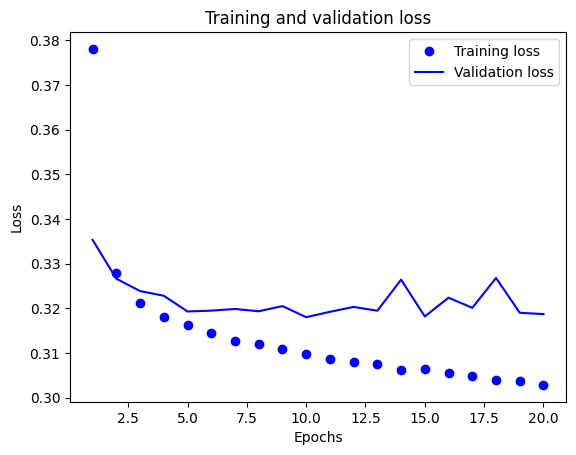

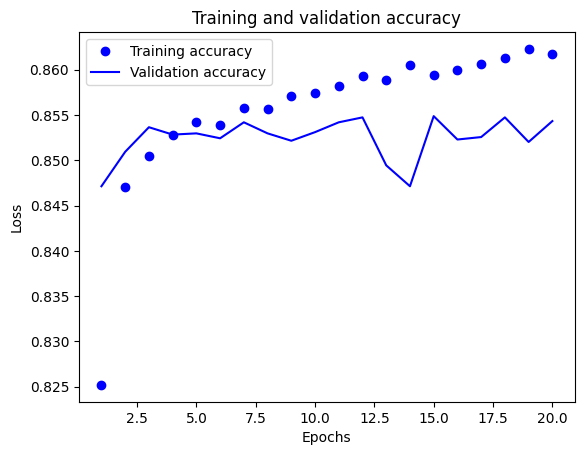

In [112]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

From the loss plot we can we see that validation loss function is decreasing with fluctuations to a point around 10 epochs and then starts increaseing with fluctuations. Not being able to be absolutly sure about the absolute minimu point we are going to choose to retrain the model for 10 epochs.
We can see that there is a slight overfitting of the model so we are going to try and add L2 regularization .This can help to prevent overfitting, as smaller weights reduce the model’s complexity and its ability to fit noise in the data.

In [113]:
#Refit the model for 10 epochs
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#Compile the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Train the model with 0.2 validation set
history = model.fit(X_train_array,
                    y_train_array,
                    epochs=10,
                    batch_size = 128,
                    validation_split = 0.2,
                    )

Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7836 - loss: 0.4540 - val_accuracy: 0.8455 - val_loss: 0.3382
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8426 - loss: 0.3333 - val_accuracy: 0.8482 - val_loss: 0.3301
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8517 - loss: 0.3193 - val_accuracy: 0.8459 - val_loss: 0.3358
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8538 - loss: 0.3202 - val_accuracy: 0.8520 - val_loss: 0.3254
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8546 - loss: 0.3154 - val_accuracy: 0.8526 - val_loss: 0.3239
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8485 - loss: 0.3232 - val_accuracy: 0.8524 - val_loss: 0.3204
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8539 - loss: 0.3150 - val_accuracy: 0.8484 - val_loss: 0.3232
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8551 - loss: 0.3136 - val_accuracy: 0.

In [114]:
test_loss, test_acc = model.evaluate(X_test_array, y_test_array)
print(f"Test accuracy: {test_acc:.3f}")

288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8528 - loss: 0.3203
Test accuracy: 0.854


AS we can see our model got slightly better with higher accuracy on the test data and really slughtly lower loss.

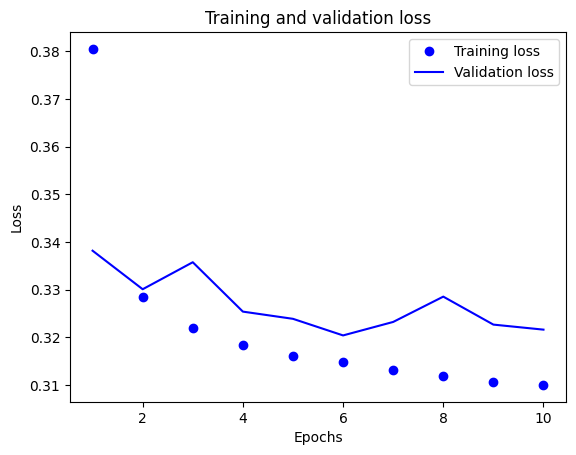

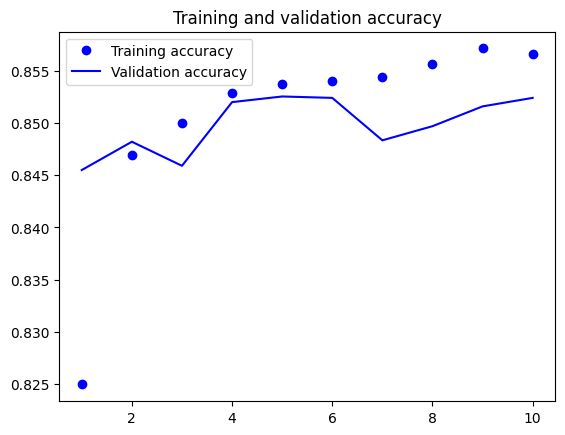

In [115]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

In [116]:
#Find the predicions
y_predictions = model.predict(X_test_array)

#Convert to labels for threshold 0.5
y_pred_labels = (y_predictions > 0.5).astype(int)

288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [117]:
#Print the probability along with the labels
results = pd.DataFrame({
    "Probability": y_predictions.flatten(),
    "Predicted_Class":y_pred_labels.flatten()
})
print(results)

      Probability  Predicted_Class
0        0.000639                0
1        0.918057                1
2        0.192740                0
3        0.004051                0
4        0.397188                0
...           ...              ...
9203     0.005403                0
9204     0.007126                0
9205     0.007981                0
9206     0.228771                0
9207     0.000405                0

[9208 rows x 2 columns]


In [118]:
#Evaluate the models performance
from sklearn.metrics import classification_report
print(classification_report(y_test_array, y_pred_labels))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      6878
           1       0.77      0.60      0.68      2330

    accuracy                           0.85      9208
   macro avg       0.82      0.77      0.79      9208
weighted avg       0.85      0.85      0.85      9208



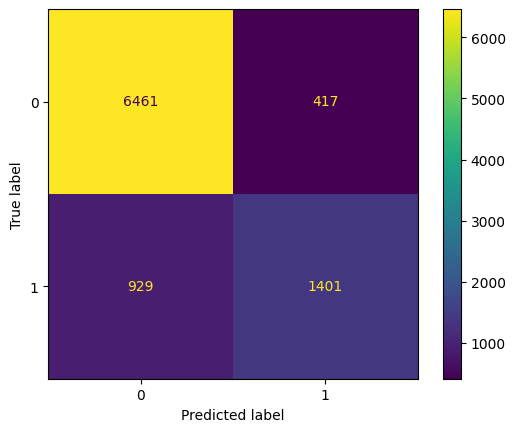

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test_array, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

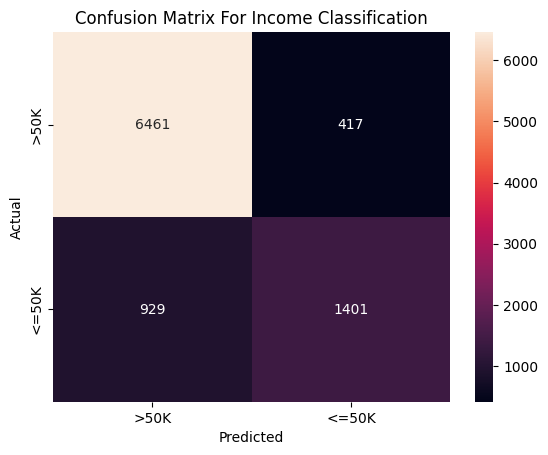

In [120]:
#More detailed cm
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_array, y_pred_labels)
labels = [">50K", "<=50K"]
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For Income Classification")
plt.show()